<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/Copy_of_VGG19_add.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [49]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:

from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras import layers

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Lec/Train'
valid_path = '/content/drive/MyDrive/Lec/Val'

In [62]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [63]:
# don't train existing weights
for layer in vgg16.layers:
   layer.trainable = False

In [65]:
x = vgg16.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation='softmax')(x)

model = keras.Model(inputs=vgg16.inputs, outputs=outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [66]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import apply_affine_transform
import random

In [32]:
FILL_MODE = 'nearest'

def right_angle_rotate(input_image):
    angle = random.choice([0, 90, 180, 270])
    if angle != 0:
        input_image = apply_affine_transform(
            input_image, theta=angle, fill_mode=FILL_MODE)
    return input_image

In [67]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   #fill_mode=FILL_MODE,
                                   #preprocessing_function=right_angle_rotate,  
                                   #vertical_flip= True,
                                   #horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [68]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 2456 images belonging to 3 classes.


In [69]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Val',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 616 images belonging to 3 classes.


In [70]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs= 20
)

Epoch 1/20
20/20 [==============================] - 20s 994ms/step - loss: 3.0377 - accuracy: 0.5134 - val_loss: 0.5646 - val_accuracy: 0.7792
Epoch 2/20
20/20 [==============================] - 19s 934ms/step - loss: 0.5267 - accuracy: 0.7712 - val_loss: 0.3513 - val_accuracy: 0.8588
Epoch 3/20
20/20 [==============================] - 19s 920ms/step - loss: 0.3360 - accuracy: 0.8624 - val_loss: 0.2939 - val_accuracy: 0.8815
Epoch 4/20
20/20 [==============================] - 18s 884ms/step - loss: 0.2259 - accuracy: 0.9125 - val_loss: 0.2417 - val_accuracy: 0.9156
Epoch 5/20
20/20 [==============================] - 19s 914ms/step - loss: 0.1781 - accuracy: 0.9292 - val_loss: 0.2713 - val_accuracy: 0.8847
Epoch 6/20
20/20 [==============================] - 18s 890ms/step - loss: 0.1726 - accuracy: 0.9308 - val_loss: 0.1536 - val_accuracy: 0.9497
Epoch 7/20
20/20 [==============================] - 19s 909ms/step - loss: 0.1586 - accuracy: 0.9471 - val_loss: 0.2978 - val_accuracy: 0.8799

In [ ]:
import matplotlib.pyplot as plt

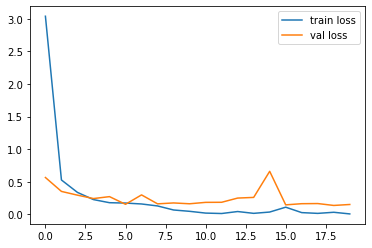

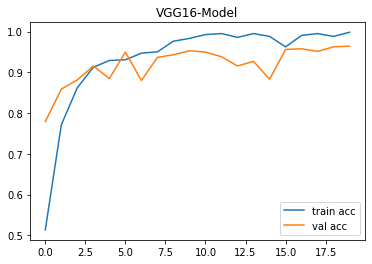

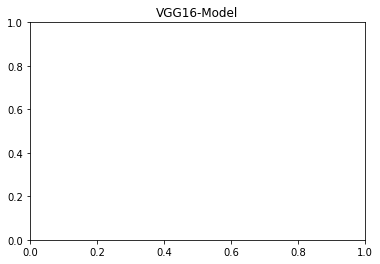

In [71]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.title('VGG16-Model')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
plt.title('VGG16-Model')
plt.show()

In [ ]:
# evaluatinn the model
model_evaluation = model.evaluate(test_data)

In [72]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16_add.h5')